In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
#from dfply import if_else
# recordarle al gidi la shit de from dfply import * 
# test['CANTIDAD DE SINIESTROS']= if_else(test['capital siniestrado UF'] >0,1,0)
%matplotlib inline

In [2]:
data= [[1.81, 0.80, 0.44, 0],
        [1.77, 0.70, 0.43, 0],
        [1.60, 0.60, 0.38, 1],
        [1.54, 0.54, 0.37, 1],
        [1.66, 0.65, 0.40, 0],
        [1.90, 0.90, 0.47, 0],
        [1.75, 0.64, 0.39, 1],
        [1.77, 0.70, 0.40, 1],
        [1.59, 0.55, 0.37, 1],
        [1.71, 0.75, 0.42, 0],
        [1.81, 0.85, 0.43, 0]]

In [66]:
def sigmoid(x) :
    return 1/(1 + np.exp(-x))

def sigmoid_p(x) :
    return sigmoid(x) * (1-sigmoid(x))
def relu(x):
    return max(0,x)
def relu_p(x):
    if x>=0:
        return 1
    else:
        return 0
        
learning_rate = 0.2
n_iterations = 1000

costs = []


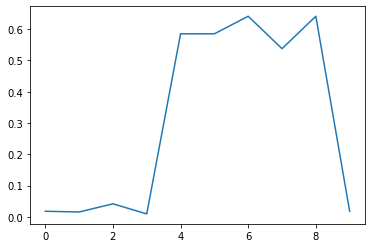

In [82]:
# loop de entrenamiento

learning_rate = 0.2
n_iterations = 1000

costs = []

w1 = np.random.randn()
w2 = np.random.randn()
w3 = np.random.randn()
w4 = np.random.randn()
w5 = np.random.randn()
b = np.random.randn()

for i in range(n_iterations):
    random_row = np.random.randint(len(data))
    point = data[random_row]
    
    z = point[0] * w1 + point[1] * w2 + point[2] * w3 + b +  point[0]*point[1]*w4 + point[1]*point[2]*w5
    prediction = relu(z)
    
    target = point[3]
    cost = np.square(prediction - target)
    
    dcost_prediction = 2 * (prediction - target)
    dprediction_dz = relu_p(z)
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_dw3 = point[2]
    dz_dw4 = point[0]*point[1]
    dz_dw5 = point[1]*point[2]
    dz_db = 1
    
    dcost_dz = dcost_prediction * dprediction_dz
    
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_dw3 = dcost_dz * dz_dw3
    dcost_dw4 = dcost_dz * dz_dw4
    dcost_dw5 = dcost_dz * dz_dw5
    dcost_db = dcost_dz * dz_db
    
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    w3 = w3 - learning_rate * dcost_dw3
    w4 = w4 - learning_rate * dcost_dw4
    w5 = w5 - learning_rate * dcost_dw5
    b = b - learning_rate * dcost_db
    
    if i % 100 == 0 :
        cost_sum = 0
        for j in range(len(data)) :
            point = data[random_row]
            
            z = point[0] * w1 + point[1] * w2 + point[2] * w3 + b +point[0]*point[1]*w4 + point[1]*point[2]*w5
            prediction = sigmoid(z)
            
            target = point[3]
            cost_sum += np.square(prediction - target)
            
        costs.append(cost_sum/len(data))

plt.plot(costs)

In [83]:
for i in range(len(data)) :
    point = data[i]
    print(point)
    
    z = point[0] * w1 + point[1] * w2 + point[2] * w3 + b +  point[0]*point[1]*w4 + point[1]*point[2]*w5
    prediction = sigmoid(z)
    print("predicción : {}" .format(prediction))

[1.81, 0.8, 0.44, 0]
predicción : 0.13468565754393272
[1.77, 0.7, 0.43, 0]
predicción : 0.16746846943747806
[1.6, 0.6, 0.38, 1]
predicción : 0.23512823076658015
[1.54, 0.54, 0.37, 1]
predicción : 0.26682350131606125
[1.66, 0.65, 0.4, 0]
predicción : 0.2047333857029474
[1.9, 0.9, 0.47, 0]
predicción : 0.09807250091763813
[1.75, 0.64, 0.39, 1]
predicción : 0.19928222183251398
[1.77, 0.7, 0.4, 1]
predicción : 0.1758532112124227
[1.59, 0.55, 0.37, 1]
predicción : 0.25664747887162026
[1.71, 0.75, 0.42, 0]
predicción : 0.16407683648013147
[1.81, 0.85, 0.43, 0]
predicción : 0.12550196889662066


In [87]:
def determinar_sexo(height, weight, shoe_size) :
    z = height * w1 + weight * w2 + shoe_size * w3 + b  + height*weight*w4 + weight*shoe_size*w5
    prediction = sigmoid(z)
    if prediction < .5:
        print('hombre')
    else:
        print('mujer')

In [88]:
determinar_sexo(1.63, 0.60, 0.37)

hombre


In [89]:
determinar_sexo(1.62, 0.49, 0.38)

hombre
